Lazy Predict ajuda a construir muitos modelos básicos sem muito código e ajuda a entender quais modelos funcionam melhor sem qualquer ajuste de parâmetro. 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install pyforest 

In [ ]:
!pip install lazypredict

In [ ]:
!pip install pyforest

Importação das Bibliotecas


In [ ]:
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
lazy_imports()

['import pydot',
 'from sklearn import svm',
 'import nltk',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import numpy as np',
 'from sklearn.model_selection import train_test_split',
 'import pandas as pd',
 'import awswrangler as wr',
 'import dash',
 'import plotly.graph_objs as go',
 'from sklearn.ensemble import RandomForestClassifier',
 'import plotly as py',
 'import bokeh',
 'from openpyxl import load_workbook',
 'import matplotlib as mpl',
 'import keras',
 'import lightgbm as lgb',
 'import tensorflow as tf',
 'from pathlib import Path',
 'import gensim',
 'import seaborn as sns',
 'import plotly.express as px',
 'from pyspark import SparkContext',
 'from sklearn.preprocessing import OneHotEncoder',
 'import datetime as dt',
 'import matplotlib.pyplot as plt',
 'import statistics',
 'import spacy',
 'from sklearn.manifold import TSNE',
 'import sys',
 'import sklearn',
 'import xgboost as xgb',
 'from sklearn.ensemble import GradientBoostingRegressor',
 '

Importaao de Pacotes


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

Esconder avisos


In [ ]:
import warnings

warnings.filterwarnings('ignore')

Exibir no máximo 100 colunas


In [ ]:
pd.options.display.max_columns = 120

importar database


In [ ]:
url = 'https://github.com/bittenks/csv-soybean-corn/raw/main/USDA_corn_2014to2020%20-%20USDA_corn_2014to2020.csv'
corn = pd.read_csv(url)


Checar se tem algum valor nulo


In [ ]:
corn = corn.drop(columns=['Date'])

In [ ]:
corn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Columns: 116 entries, Area Planted to Diff_Avr
dtypes: float64(116)
memory usage: 79.0 KB


In [ ]:
corn.describe()

,Area Planted,Area Harvested,Yield,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,Ethanol,Total Domestic,Exports,Total Use,Ending Stocks,World BeginningStocks,World Production,World Imports,World DomesticFeed,World DomesticTotal,World Exports,World EndingStocks,United States BeginningStocks,United States Production,United States Imports,United States DomesticFeed,United States DomesticTotal,United States Exports,United States EndingStocks,Argentina BeginningStocks,Argentina Production,Argentina Imports,Argentina DomesticFeed,Argentina DomesticTotal,Argentina Exports,Argentina EndingStocks,Brazil BeginningStocks,Brazil Production,Brazil Imports,Brazil DomesticFeed,Brazil DomesticTotal,Brazil Exports,Brazil EndingStocks,China BeginningStocks,China Production,China Imports,China DomesticFeed,China DomesticTotal,China Exports,China EndingStocks,Japan BeginningStocks,Japan Production,Japan Imports,Japan DomesticFeed,Japan DomesticTotal,Japan Exports,Japan EndingStocks,Mexico BeginningStocks,Mexico Production,Mexico Imports,Mexico DomesticFeed,Mexico DomesticTotal,Mexico Exports,Mexico EndingStocks,South Korea BeginningStocks,South Korea Production,South Korea Imports,South Korea DomesticFeed,South Korea DomesticTotal,South Korea Exports,South Korea EndingStocks,South Africa BeginningStocks,South Africa Production,South Africa Imports,South Africa DomesticFeed,South Africa DomesticTotal,South Africa Exports,South Africa EndingStocks,Canada BeginningStocks,Canada Production,Canada Imports,Canada DomesticFeed,Canada DomesticTotal,Canada Exports,Canada EndingStocks,Ukraine BeginningStocks,Ukraine Production,Ukraine Imports,Ukraine DomesticFeed,Ukraine DomesticTotal,Ukraine Exports,Ukraine EndingStocks,Egypt BeginningStocks,Egypt Production,Egypt Imports,Egypt DomesticFeed,Egypt DomesticTotal,Egypt Exports,Egypt EndingStocks,Southeast Asia BeginningStocks,Southeast Asia Production,Southeast Asia Imports,Southeast Asia DomesticFeed,Southeast Asia DomesticTotal,Southeast Asia Exports,Southeast Asia EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticFeed,European Union DomesticTotal,European Union Exports,European Union EndingStocks,Value,Diff_Value,Average,Diff_Avr
count,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,84.00,84.00,84.00,84.00
mean,91.60,83.86,168.39,1668.92,14111.21,49.10,15829.25,5332.03,6675.59,5262.74,12007.11,2021.44,14028.68,1800.67,232.19,1042.31,141.53,634.93,1037.60,147.60,236.91,42.59,360.62,1.17,135.55,304.87,51.96,47.56,2.33,35.66,0.01,7.50,11.07,24.11,2.80,10.21,88.59,1.13,51.42,60.73,28.94,10.26,130.21,231.83,5.09,167.47,237.90,0.03,129.20,1.11,0.00,15.29,11.43,15.31,0.00,1.10,3.70,25.84,13.96,21.09,38.51,0.87,4.12,1.78,0.08,10.22,7.99,10.24,0.00,1.83,2.43,12.99,0.65,6.11,11.92,1.81,2.34,1.98,13.48,1.32,8.01,13.44,1.39,2.00,1.52,28.90,0.04,6.14,7.47,21.55,1.45,1.94,6.16,8.81,12.57,14.96,0.01,1.94,3.39,28.47,13.84,33.44,41.37,0.92,3.42,7.46,64.23,16.05,58.55,77.73,2.54,7.47,3.78,0.01,3.77,0.00
std,2.87,2.69,11.65,495.76,936.03,28.25,1194.33,314.72,259.95,232.29,485.49,378.61,826.13,478.56,73.69,76.75,22.03,59.93,86.23,25.62,61.53,12.82,23.72,0.74,7.95,12.03,9.67,12.62,1.36,10.05,0.00,1.98,2.43,7.36,1.41,4.20,13.01,0.66,4.80,5.34,8.06,4.64,61.23,19.76,4.40,18.98,29.00,0.03,55.66,0.38,0.00,0.46,0.70,0.45,0.00,0.39

In [ ]:

corn.replace([np.inf, -np.inf], np.nan, inplace=True)
corn.dropna(inplace=True)

In [ ]:

X = corn.drop(columns=['Average', 'Value','Diff_Value','Diff_Avr'])
y = corn.Average


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,test_size=0.25)

<IPython.core.display.Javascript object>

In [ ]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

 74%|███████▍  | 31/42 [00:05<00:01,  8.18it/s]

RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 63.


100%|██████████| 42/42 [00:06<00:00,  6.75it/s]

                                                              Adjusted R-Squared  \
Model                                                                              
Lars                          35952679127723981308718531010791675760445126284...   
KernelRidge                                                                19.75   
GaussianProcessRegressor                                                    9.67   
TransformedTargetRegressor                                                  1.45   
LinearRegression                                                            1.45   
DummyRegressor                                                              1.22   
ElasticNet                                                                  1.22   
Lasso                                                                       1.22   
LassoLars                                                                   1.22   
ExtraTreeRegressor                                                          

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
def rmse(model, y_test, y_pred, X_train, y_train):
  r_squared = model.score(X_test, y_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  print('R-squared:  '+ str(r_squared))
  print('Mean Squared Error: '+ str(rmse))

In [ ]:
def scatter_plot(y_test, y_pred, model_name):
   plt.figure(figsize=(10,6))
   sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
             line_kws={'lw': 2, 'color': 'r'})
   plt.title(str('test vs predict for '+ model_name))
   plt.xlabel('Average',fontsize=16)
   plt.xticks(fontsize=13)
   plt.yticks(fontsize=13)
   plt.show()

In [ ]:
hist = HistGradientBoostingRegressor()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [ ]:
rmse(hist, y_test, y_pred, X_train, y_train)

R-squared:  0.25357446797088146
Mean Squared Error: 0.35511497740194176


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

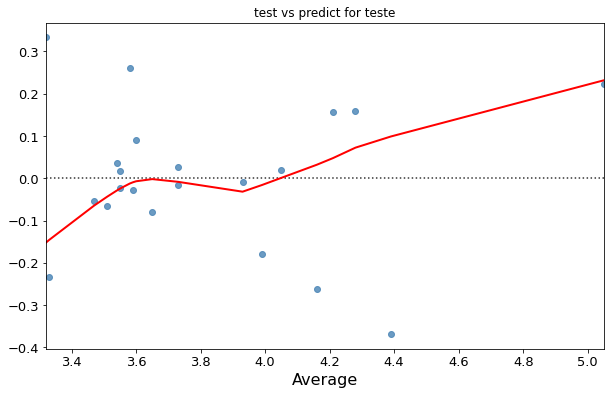

In [ ]:
scatter_plot(y_test, y_pred,'teste')